<a href="https://www.kaggle.com/code/shababmahmood/importing-nyc-open-data-api-and-analysis?scriptVersionId=162038885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup
import requests
import numpy as np
import datetime
import seaborn as sns

The purpose of this is to highlight my ability to use apis, and data analysis skills. I took payroll data sourced by the city government to gather insights about the division.

I first start by importing the necessary libraries, and then importing the api through the url given to me by the website.

In [2]:
api_url = 'https://data.cityofnewyork.us/resource/k397-673e.json'

response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print("Data loaded successfully!")
else:
    print("Failed to retrieve data. Status code:", response.status_code)

Data loaded successfully!


Here I begin doing exploratory data analysis, to look at the data and see what I am working with, and what insights I can gather with this.

In [3]:
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2023,67,ADMIN FOR CHILDREN'S SVCS,GUERRIER,WALTHRIDE,M,1996-06-23T00:00:00.000,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,114174.00,per Annum,1820.00,114210.46,0.00,5.09,4477.97
1,2023,67,ADMIN FOR CHILDREN'S SVCS,HULL,RENEE,NaN,1996-06-23T00:00:00.000,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,CEASED,80455.00,per Annum,0.00,0.00,0.00,0.00,6159.21
2,2023,67,ADMIN FOR CHILDREN'S SVCS,GLOVER,TORRAY,A,2018-10-01T00:00:00.000,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,ACTIVE,62224.00,per Annum,1820.00,53088.57,484.25,22621.83,9079.06
3,2023,67,ADMIN FOR CHILDREN'S SVCS,GUERRERO,MELISSA,NaN,2005-01-31T00:00:00.000,MANHATTAN,CONGREG CARE SPEC - ACS,ACTIVE,65638.00,per Annum,1684.00,61319.65,165.75,7918.88,7519.38
4,2023,67,ADMIN FOR CHILDREN'S SVCS,HENDRICKS,LATOYA,N,2022-02-28T00:00:00.000,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,60236.00,per Annum,1820.00,58114.13,0.00,0.00,3373.25


I noticed that there were some columns, that seemed useless for me such as payroll number,and mid_init so I decided to drop them.

In [4]:
df.drop(['payroll_number','mid_init'], axis=1, inplace=True)
df.head()

,fiscal_year,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2023,ADMIN FOR CHILDREN'S SVCS,GUERRIER,WALTHRIDE,1996-06-23T00:00:00.000,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,114174.00,per Annum,1820.00,114210.46,0.00,5.09,4477.97
1,2023,ADMIN FOR CHILDREN'S SVCS,HULL,RENEE,1996-06-23T00:00:00.000,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,CEASED,80455.00,per Annum,0.00,0.00,0.00,0.00,6159.21
2,2023,ADMIN FOR CHILDREN'S SVCS,GLOVER,TORRAY,2018-10-01T00:00:00.000,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,ACTIVE,62224.00,per Annum,1820.00,53088.57,484.25,22621.83,9079.06
3,2023,ADMIN FOR CHILDREN'S SVCS,GUERRERO,MELISSA,2005-01-31T00:00:00.000,MANHATTAN,CONGREG CARE SPEC - ACS,ACTIVE,65638.00,per Annum,1684.00,61319.65,165.75,7918.88,7519.38
4,2023,ADMIN FOR CHILDREN'S SVCS,HENDRICKS,LATOYA,2022-02-28T00:00:00.000,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,60236.00,per Annum,1820.00,58114.13,0.00,0.00,3373.25


I then look for unqiue values in certain columns to see what information is avaiable in each column, and what I can expect to see in these columns.

In [5]:
print(df['fiscal_year'].unique())
print(df['agency_name'].unique())
print(df['title_description'].unique())
print(df['leave_status_as_of_june_30'].unique())
print(df['pay_basis'].unique())

['2023']
["ADMIN FOR CHILDREN'S SVCS"]
['ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES'
 'CHILD PROTECTIVE SPECIALIST SUPERVISOR' 'YOUTH DEVELOPMENT SPECIALIST'
 'CONGREG CARE SPEC - ACS' 'CHILD PROTECTIVE SPECIALIST'
 'COMMUNITY COORDINATOR' 'CASEWORKER' 'CHILD AND FAMILY SPECIALIST'
 'PROTECTION AGENT' 'ADMINISTRATIVE STAFF ANALYST' 'COMPUTER ASSOCIATE'
 'CITY RESEARCH SCIENTIST' '*SENIOR COOK' 'CHILD WELFARE SPECIALIST'
 'ADM MANAGER-NON-MGRL' 'DIRECTOR OF FIELD OPERATIONS'
 'CHILD WELFARE SPECIALIST SUPERVISOR' 'STAFF ANALYST'
 'PRINCIPAL ADMINISTRATIVE ASSOCIATE -  NON SUPVR'
 'SUPERVISING SPECIAL OFFICER' 'ASSOCIATE YOUTH DEVELOPMENT SPECIALIST'
 'MOTOR VEHICLE OPERATOR' 'EXECUTIVE AGENCY COUNSEL'
 'ASSOCIATE STAFF ANALYST' 'CLERICAL ASSOCIATE' 'PROGRAM EVALUATOR'
 '*ATTORNEY AT LAW' 'CONGREG CARE SPEC- DJJ' 'COMPUTER SYSTEMS MANAGER'
 'INSTITUTIONAL AIDE' 'AGENCY ATTORNEY' 'SUPERVISOR II'
 'TELECOMMUNICATIONS ASSOCIATE' 'SUPERVISOR I' 'COMMUNITY ASSOCIATE'
 'ADMINISTRATIVE MANAGEME

I then check to see how many rows, unqiue values, the top values, and the frequency of each top value in each column. 

What I have noticed is that this is only taking information from 2023, since the count and freq match. This is also taking information from one agency as well for the same reasons.

In [6]:
df.describe()

,fiscal_year,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,1,521,748,365,5,69,4,435,3,171,794,419,601,777
top,2023,ADMIN FOR CHILDREN'S SVCS,HARRIS,JESSICA,1996-06-23T00:00:00.000,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,65921.00,per Annum,1820.00,65998.30,0.00,0.00,0.00
freq,1000,1000,27,12,105,493,357,682,152,992,505,80,511,398,133


I now check for an null values, and check for the type of values I will be working with. I see that they are all labeled as object type, which means I have to convert certain values in order to work with them for any further analysis.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fiscal_year                 1000 non-null   object
 1   agency_name                 1000 non-null   object
 2   last_name                   1000 non-null   object
 3   first_name                  1000 non-null   object
 4   agency_start_date           1000 non-null   object
 5   work_location_borough       1000 non-null   object
 6   title_description           1000 non-null   object
 7   leave_status_as_of_june_30  1000 non-null   object
 8   base_salary                 1000 non-null   object
 9   pay_basis                   1000 non-null   object
 10  regular_hours               1000 non-null   object
 11  regular_gross_paid          1000 non-null   object
 12  ot_hours                    1000 non-null   object
 13  total_ot_paid               1000 non-null   objec

 I begin by initially converting base_salary, regular_gross_paid, total_ot_paid, and total_other_pay into floats in order to create a column called total_compensation by adding them all up. The total_compensation column tells you the total pay received by each employee.

In [8]:
df['base_salary'] = pd.to_numeric(df['base_salary'])
df['regular_gross_paid'] = pd.to_numeric(df['regular_gross_paid'])
df['total_ot_paid'] = pd.to_numeric(df['total_ot_paid'])
df['total_other_pay'] = pd.to_numeric(df['total_other_pay'])
df.dtypes

fiscal_year                    object
agency_name                    object
last_name                      object
first_name                     object
agency_start_date              object
work_location_borough          object
title_description              object
leave_status_as_of_june_30     object
base_salary                   float64
pay_basis                      object
regular_hours                  object
regular_gross_paid            float64
ot_hours                       object
total_ot_paid                 float64
total_other_pay               float64
dtype: object

In [9]:
df['total_compensation'] = df['regular_gross_paid'] + df['total_ot_paid'] + df['total_other_pay']
df.head()

,fiscal_year,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,total_compensation
0,2023,ADMIN FOR CHILDREN'S SVCS,GUERRIER,WALTHRIDE,1996-06-23T00:00:00.000,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,114174.0,per Annum,1820.00,114210.46,0.00,5.09,4477.97,118693.52
1,2023,ADMIN FOR CHILDREN'S SVCS,HULL,RENEE,1996-06-23T00:00:00.000,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,CEASED,80455.0,per Annum,0.00,0.00,0.00,0.00,6159.21,6159.21
2,2023,ADMIN FOR CHILDREN'S SVCS,GLOVER,TORRAY,2018-10-01T00:00:00.000,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,ACTIVE,62224.0,per Annum,1820.00,53088.57,484.25,22621.83,9079.06,84789.46
3,2023,ADMIN FOR CHILDREN'S SVCS,GUERRERO,MELISSA,2005-01-31T00:00:00.000,MANHATTAN,CONGREG CARE SPEC - ACS,ACTIVE,65638.0,per Annum,1684.00,61319.65,165.75,7918.88,7519.38,76757.91
4,2023,ADMIN FOR CHILDREN'S SVCS,HENDRICKS,LATOYA,2022-02-28T00:00:00.000,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,60236.0,per Annum,1820.00,58114.13,0.00,0.00,3373.25,61487.38


I now do conversions to extract the years, and later on create a column called total_years_in_service.

In [10]:
df['agency_start_date'] = pd.to_datetime(df['agency_start_date'])

df['start_year'] = df['agency_start_date'].dt.year

df.drop('agency_start_date', axis = 1, inplace = True)

In [11]:
df['fiscal_year'] = pd.to_numeric(df['fiscal_year'])
df['start_year'] = pd.to_numeric(df['start_year'])
df['total_years_in_service'] = df['fiscal_year'] - df['start_year']
df.head()

,fiscal_year,agency_name,last_name,first_name,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,total_compensation,start_year,total_years_in_service
0,2023,ADMIN FOR CHILDREN'S SVCS,GUERRIER,WALTHRIDE,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,114174.0,per Annum,1820.00,114210.46,0.00,5.09,4477.97,118693.52,1996,27
1,2023,ADMIN FOR CHILDREN'S SVCS,HULL,RENEE,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,CEASED,80455.0,per Annum,0.00,0.00,0.00,0.00,6159.21,6159.21,1996,27
2,2023,ADMIN FOR CHILDREN'S SVCS,GLOVER,TORRAY,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,ACTIVE,62224.0,per Annum,1820.00,53088.57,484.25,22621.83,9079.06,84789.46,2018,5
3,2023,ADMIN FOR CHILDREN'S SVCS,GUERRERO,MELISSA,MANHATTAN,CONGREG CARE SPEC - ACS,ACTIVE,65638.0,per Annum,1684.00,61319.65,165.75,7918.88,7519.38,76757.91,2005,18
4,2023,ADMIN FOR CHILDREN'S SVCS,HENDRICKS,LATOYA,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,60236.0,per Annum,1820.00,58114.13,0.00,0.00,3373.25,61487.38,2022,1


I now check the stats of the highest earner in the agency. Congrats Jess.

In [12]:
highest_earner = df['total_compensation'].idxmax()
highest_earner = df.loc[highest_earner]
print(highest_earner)

fiscal_year                                           2023
agency_name                      ADMIN FOR CHILDREN'S SVCS
last_name                                           HESTER
first_name                                         MELISSA
work_location_borough                            MANHATTAN
title_description             ADMINISTRATIVE STAFF ANALYST
leave_status_as_of_june_30                          ACTIVE
base_salary                                       235224.0
pay_basis                                        per Annum
regular_hours                                      1820.00
regular_gross_paid                               225055.97
ot_hours                                              0.00
total_ot_paid                                          0.0
total_other_pay                                      936.0
total_compensation                               225991.97
start_year                                            2018
total_years_in_service                                  

I now look at the highest earning positions in this agency

In [13]:
pd.set_option('display.max_rows', None)
average_salaries_by_title = df.groupby('title_description')['total_compensation'].mean()
average_salaries_by_title = average_salaries_by_title.sort_values(ascending = False)
print(average_salaries_by_title)

title_description
ASSISTANT COMMISSIONER FOR FACILITIES DEVELOPMENT & CONST    225055.970000
DEPUTY COMMISSIONER                                          203402.670000
ADMINISTRATIVE CONTRACT SPECIALIST                           191896.820000
DIRECTOR OF HEADSTART PROGRAM                                162023.590000
EXECUTIVE AGENCY COUNSEL                                     157064.884286
ADMIN CONSTRUCTION PROJECT MANAGER                           156580.790000
ADMINISTRATIVE MANAGER                                       135158.660000
ASST COMMISSIONER FOR PLANNING & PRG DEVE                    133829.290000
ADMINISTRATIVE ARCHITECT                                     131067.680000
COMPUTER SYSTEMS MANAGER                                     129671.332500
ADMINISTRATIVE MANAGEMENT AUDITOR                            123681.080000
CITY LABORER                                                 118541.470000
ADMINISTRATIVE STAFF ANALYST                                 108396.896500
ADMINIS

I now look to see which job works the most overtime.

In [14]:
df['ot_hours'] = pd.to_numeric(df['ot_hours'])
average_overtime_by_title = df.groupby('title_description')['ot_hours'].mean()
average_overtime_by_title = average_overtime_by_title.sort_values(ascending = False)
print(average_overtime_by_title)

title_description
ADMINISTRATIVE CONTRACT SPECIALIST                           997.500000
MOTOR VEHICLE OPERATOR                                       698.687500
CONGREG CARE SPEC - ACS                                      393.690476
INSTITUTIONAL AIDE                                           346.350000
ADMINISTRATIVE DIRECTOR OF RESIDENTIAL CHILD CARE            344.321429
CARPENTER                                                    289.250000
SUPERVISOR III                                               239.750000
YOUTH DEVELOPMENT SPECIALIST                                 237.802885
CITY LABORER                                                 227.000000
*COOK                                                        204.250000
SUPERVISOR II                                                204.250000
RESEARCH ASSISTANT                                           191.750000
SPECIAL OFFICER                                              179.630833
ADM MANAGER-NON-MGRL                          

As well as the average overtime payments

In [15]:
average_overtime_paid_by_title = df.groupby('title_description')['total_ot_paid'].mean()
average_overtime_paid_by_title = average_overtime_paid_by_title.sort_values(ascending = False)
print(average_overtime_paid_by_title)

title_description
ADMINISTRATIVE CONTRACT SPECIALIST                           81253.750000
MOTOR VEHICLE OPERATOR                                       28086.070000
ADMINISTRATIVE DIRECTOR OF RESIDENTIAL CHILD CARE            22668.452857
CARPENTER                                                    21742.250000
CITY LABORER                                                 17417.770000
CONGREG CARE SPEC - ACS                                      16429.049524
SUPERVISOR III                                               13442.270000
SUPERVISOR II                                                12382.996667
INSTITUTIONAL AIDE                                           10872.390000
YOUTH DEVELOPMENT SPECIALIST                                 10410.267404
ADM MANAGER-NON-MGRL                                         10323.021250
RESEARCH ASSISTANT                                            9518.370000
CHILD PROTECTIVE SPECIALIST SUPERVISOR                        9447.595968
PROGRAM EVALUATOR   

We look at the positions that pay the most other payments

In [16]:
average_other_paid_by_title = df.groupby('title_description')['total_ot_paid'].mean()
average_other_paid_by_title = average_other_paid_by_title.sort_values(ascending = False)
print(average_other_paid_by_title)

title_description
ADMINISTRATIVE CONTRACT SPECIALIST                           81253.750000
MOTOR VEHICLE OPERATOR                                       28086.070000
ADMINISTRATIVE DIRECTOR OF RESIDENTIAL CHILD CARE            22668.452857
CARPENTER                                                    21742.250000
CITY LABORER                                                 17417.770000
CONGREG CARE SPEC - ACS                                      16429.049524
SUPERVISOR III                                               13442.270000
SUPERVISOR II                                                12382.996667
INSTITUTIONAL AIDE                                           10872.390000
YOUTH DEVELOPMENT SPECIALIST                                 10410.267404
ADM MANAGER-NON-MGRL                                         10323.021250
RESEARCH ASSISTANT                                            9518.370000
CHILD PROTECTIVE SPECIALIST SUPERVISOR                        9447.595968
PROGRAM EVALUATOR   

And see the staff size for each position. There are many Administrative, Tech, and remedial workers with 1 person staffs. 

In [17]:
title_count = df['title_description'].value_counts()
print(title_count)

title_description
CHILD PROTECTIVE SPECIALIST                                  357
YOUTH DEVELOPMENT SPECIALIST                                 104
CHILD PROTECTIVE SPECIALIST SUPERVISOR                        62
COMMUNITY COORDINATOR                                         46
ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES                    42
DIRECTOR OF FIELD OPERATIONS                                  38
PRINCIPAL ADMINISTRATIVE ASSOCIATE -  NON SUPVR               34
CHILD WELFARE SPECIALIST                                      26
CONGREG CARE SPEC - ACS                                       21
CHILD AND FAMILY SPECIALIST                                   20
ADMINISTRATIVE STAFF ANALYST                                  20
PROTECTION AGENT                                              19
AGENCY ATTORNEY                                               15
CHILD WELFARE SPECIALIST SUPERVISOR                           14
CITY RESEARCH SCIENTIST                                       13
SPECIAL

I am now making a new dataframe for all this information.

In [18]:
df2 = pd.concat([title_count, average_other_paid_by_title, 
                         average_salaries_by_title, 
                         average_overtime_by_title, average_overtime_paid_by_title], 
                        axis=1)

df2.columns = ['title_count',
               'average_other_paid_by_title', 
               'average_salaries_by_title', 
               'average_overtime_by_title',
               'average_overtime_paid_by_title']

df2.reset_index(inplace=True)
df2.rename(columns={'index': 'title_description'}, inplace=True)

df2

,title_description,title_count,average_other_paid_by_title,average_salaries_by_title,average_overtime_by_title,average_overtime_paid_by_title
0,CHILD PROTECTIVE SPECIALIST,357,5416.867451,52064.514734,116.442577,5416.867451
1,YOUTH DEVELOPMENT SPECIALIST,104,10410.267404,39596.154712,237.802885,10410.267404
2,CHILD PROTECTIVE SPECIALIST SUPERVISOR,62,9447.595968,93656.884516,142.544355,9447.595968
3,COMMUNITY COORDINATOR,46,3587.737609,69818.765435,69.472826,3587.737609
4,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,42,2594.690952,104932.659048,37.315476,2594.690952
5,DIRECTOR OF FIELD OPERATIONS,38,13.670263,102558.954737,0.000000,13.670263
6,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,34,2492.902941,57543.001471,57.279412,2492.902941
7,CHILD WELFARE SPECIALIST,26,2311.986923,58634.129615,47.596154,2311.986923
8,CONGREG CARE SPEC - ACS,21,16429.049524,63049.131429,393.690476,16429.049524
9,CHILD AND FAMILY SPECIALIST,20,7316.928500,80090.171500,106.037500,7316.928500


I now begin creating visuals to show the highest earning positions, as well as the most over worked positions as well.

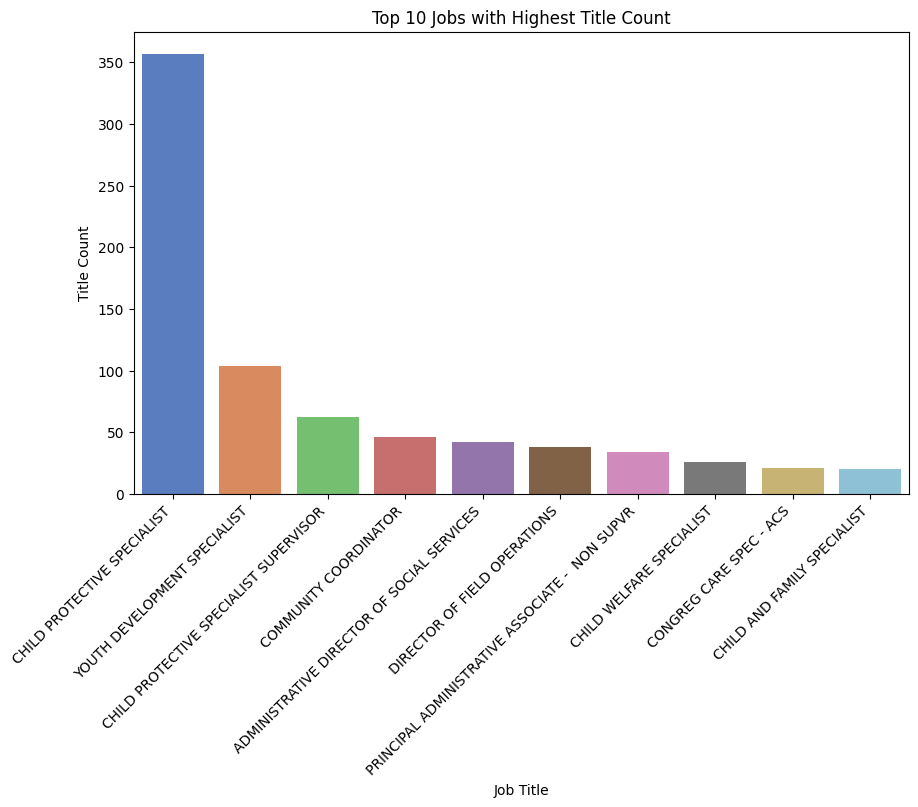

In [19]:
# Sort the DataFrame by 'title_count' column in descending order
top_10_jobs = df2.sort_values(by='title_count', ascending=False).head(10)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 5 jobs with the highest title_count
sns.barplot(x='title_description', y='title_count', data=top_10_jobs, palette='muted')

# Add labels and title
plt.xlabel("Job Title")
plt.ylabel("Title Count")
plt.title("Top 10 Jobs with Highest Title Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

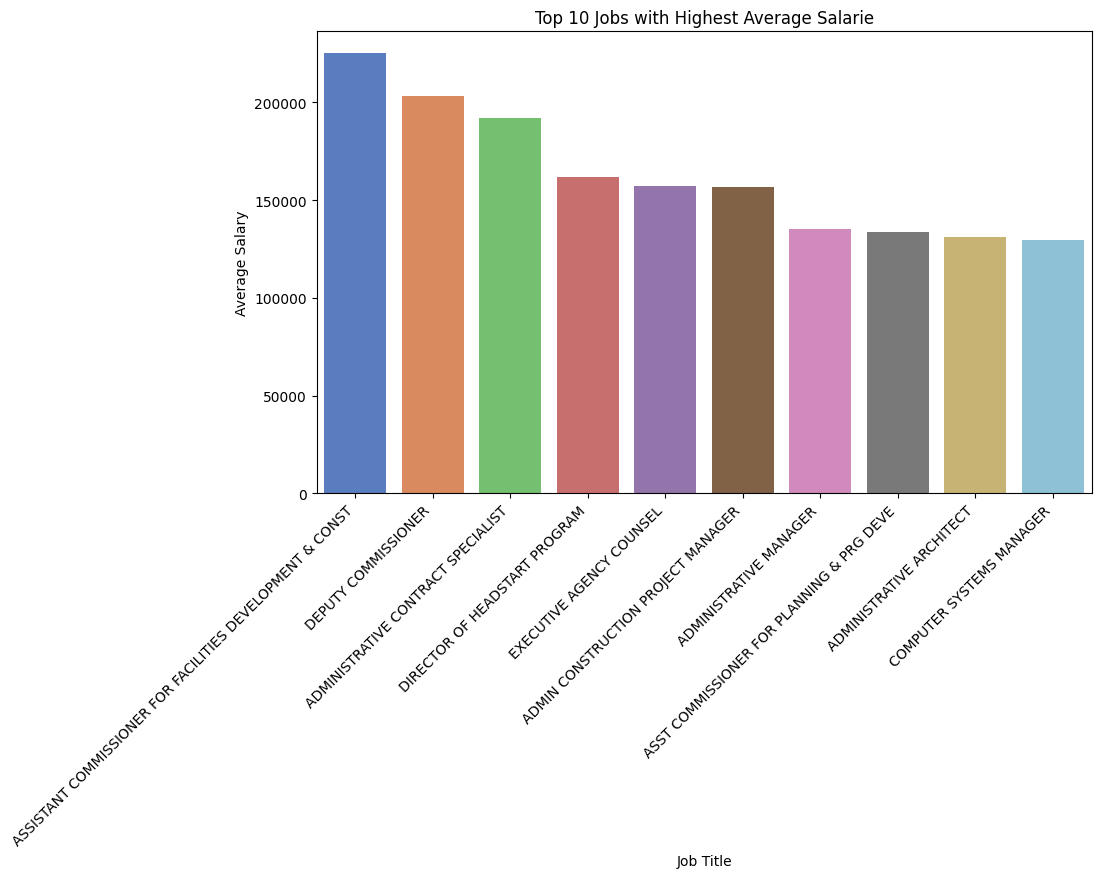

In [20]:
# Sort the DataFrame by 'title_count' column in descending order
top_10_salaries = df2.sort_values(by='average_salaries_by_title', ascending=False).head(10)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 5 jobs with the highest title_count
sns.barplot(x='title_description', y='average_salaries_by_title', data=top_10_salaries, palette='muted')

# Add labels and title
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Top 10 Jobs with Highest Average Salarie")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

I am now creating graphs for the positions that work the most overtime and receive the most over time pay. What I noticed is that these jobs have only one employee working these positions. This can indicate understaffing in these areas, and points of increased efficiency as this would reduce over time worked, and better contain operations to regular working hours.

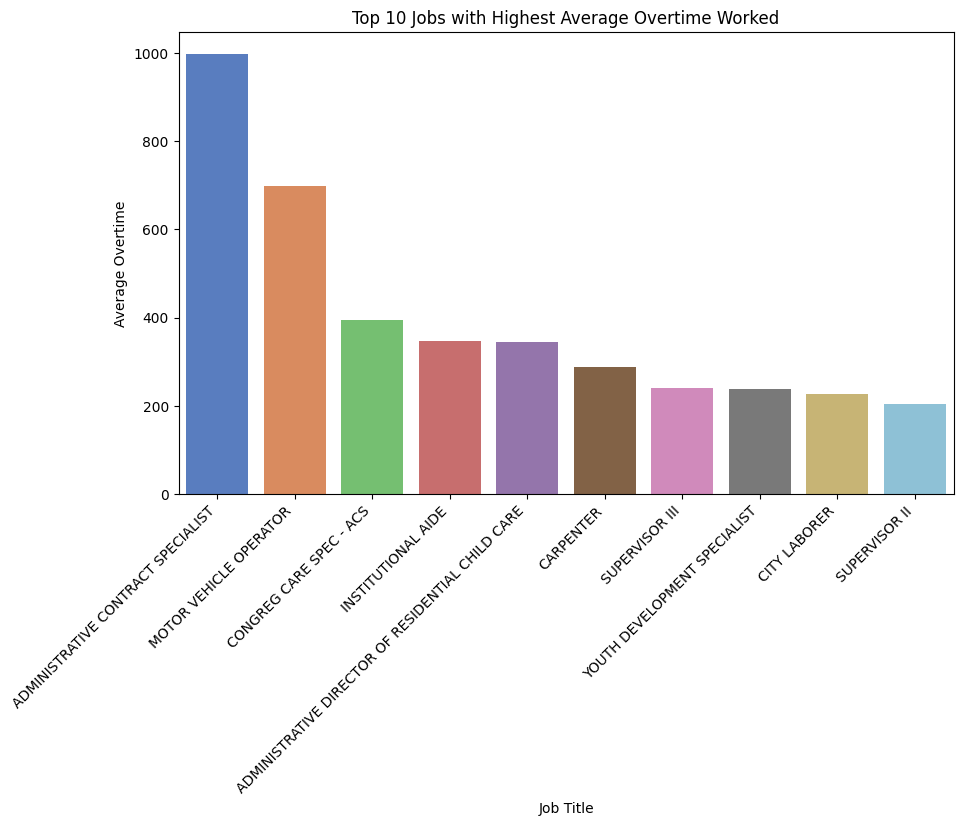

In [21]:
# Sort the DataFrame by 'title_count' column in descending order
top_10_ot = df2.sort_values(by='average_overtime_by_title', ascending=False).head(10)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 5 jobs with the highest title_count
sns.barplot(x='title_description', y='average_overtime_by_title', data=top_10_ot, palette='muted')

# Add labels and title
plt.xlabel("Job Title")
plt.ylabel("Average Overtime")
plt.title("Top 10 Jobs with Highest Average Overtime Worked")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

In [22]:
# Sort the DataFrame by 'average_overtime_by_title' column in descending order
top_jobs_with_highest_overtime = df2.sort_values(by='average_overtime_by_title', ascending=False)

# Select the top 10 jobs with the highest overtime
top_10_jobs_with_highest_overtime = top_jobs_with_highest_overtime.head(10)

# Get the value counts of these selected jobs
value_counts_of_top_ot = top_10_jobs_with_highest_overtime['title_description'].value_counts()

# Display the value counts
print(value_counts_of_top_ot)

title_description
ADMINISTRATIVE CONTRACT SPECIALIST                   1
MOTOR VEHICLE OPERATOR                               1
CONGREG CARE SPEC - ACS                              1
INSTITUTIONAL AIDE                                   1
ADMINISTRATIVE DIRECTOR OF RESIDENTIAL CHILD CARE    1
CARPENTER                                            1
SUPERVISOR III                                       1
YOUTH DEVELOPMENT SPECIALIST                         1
CITY LABORER                                         1
SUPERVISOR II                                        1
Name: count, dtype: int64


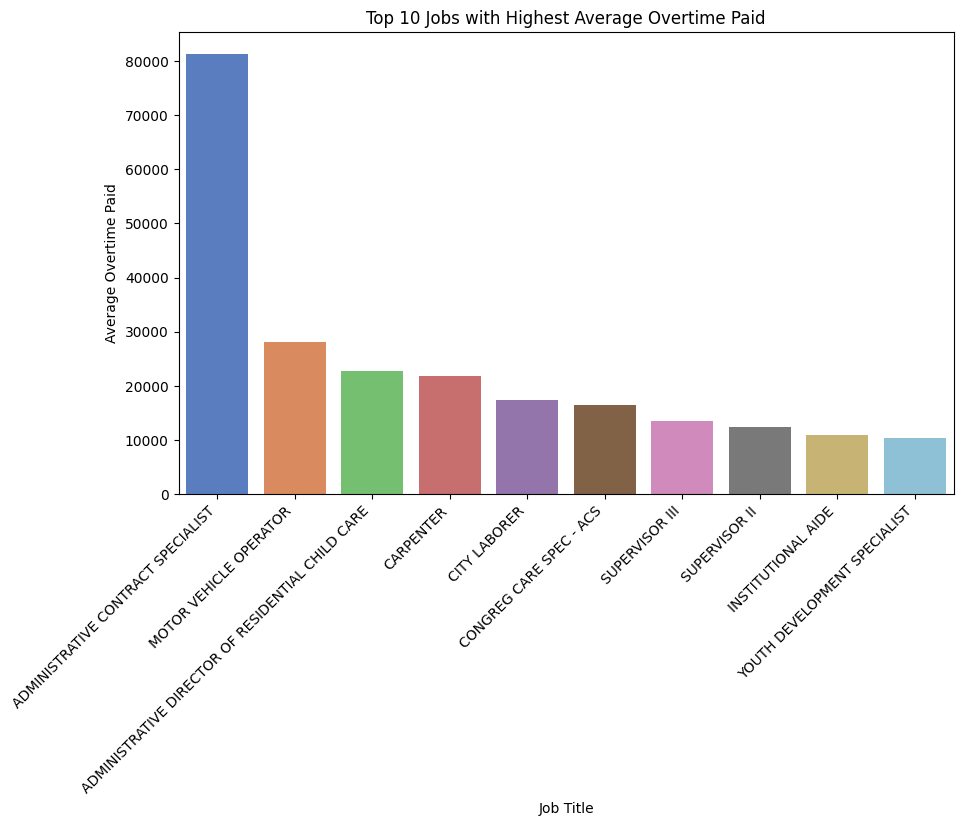

In [23]:
# Sort the DataFrame by 'title_count' column in descending order
top_10_otw = df2.sort_values(by='average_overtime_paid_by_title', ascending=False).head(10)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 5 jobs with the highest title_count
sns.barplot(x='title_description', y='average_overtime_paid_by_title', data=top_10_otw, palette='muted')

# Add labels and title
plt.xlabel("Job Title")
plt.ylabel("Average Overtime Paid")
plt.title("Top 10 Jobs with Highest Average Overtime Paid")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

In [24]:
# Sort the DataFrame by 'average_overtime_by_title' column in descending order
top_jobs_with_highest_overtime_paid = df2.sort_values(by='average_overtime_paid_by_title', ascending=False)

# Select the top 10 jobs with the highest overtime
top_10_jobs_with_highest_overtime_paid = top_jobs_with_highest_overtime_paid.head(10)

# Get the value counts of these selected jobs
value_counts_of_top_otw = top_10_jobs_with_highest_overtime_paid['title_description'].value_counts()

# Display the value counts
print(value_counts_of_top_otw)

title_description
ADMINISTRATIVE CONTRACT SPECIALIST                   1
MOTOR VEHICLE OPERATOR                               1
ADMINISTRATIVE DIRECTOR OF RESIDENTIAL CHILD CARE    1
CARPENTER                                            1
CITY LABORER                                         1
CONGREG CARE SPEC - ACS                              1
SUPERVISOR III                                       1
SUPERVISOR II                                        1
INSTITUTIONAL AIDE                                   1
YOUTH DEVELOPMENT SPECIALIST                         1
Name: count, dtype: int64


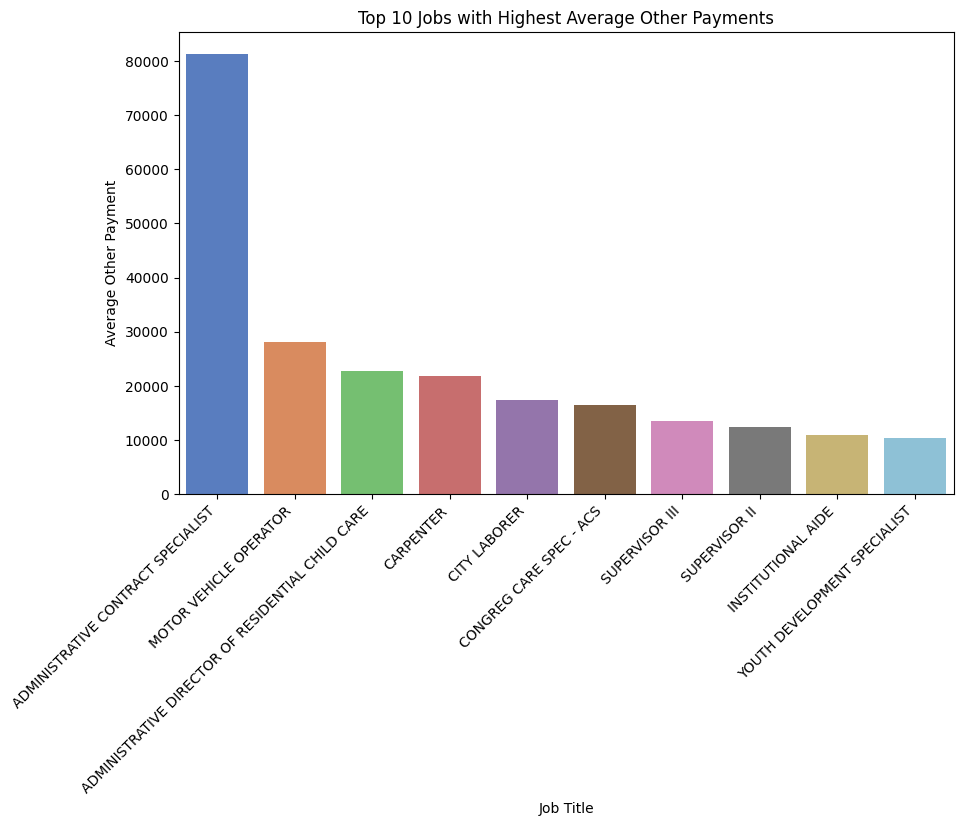

In [25]:
# Sort the DataFrame by 'title_count' column in descending order
top_10_other = df2.sort_values(by='average_other_paid_by_title', ascending=False).head(10)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 5 jobs with the highest title_count
sns.barplot(x='title_description', y='average_other_paid_by_title', data=top_10_other, palette='muted')

# Add labels and title
plt.xlabel("Job Title")
plt.ylabel("Average Other Payment")
plt.title("Top 10 Jobs with Highest Average Other Payments")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

I then created a histogram to show the years spent at the agency. And what it shows is that the largest concentration of employees fall between 0 and 5 years before it starts to decrease. What this shows is the potential retention rate of the agency. If most of their employees have 0-5 years with the company before it drops off, it can indicate that that's how long employees usually stay. 

Now why would they leave? I wanted to see which positions are usually staying within this range, and it's usually non-administrative staff, who don't make a lot of money, and are working a lot of overtime as well. Under paid and over worked staff, can be a reason as to why some of these employees don't stay longer than 5 years.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


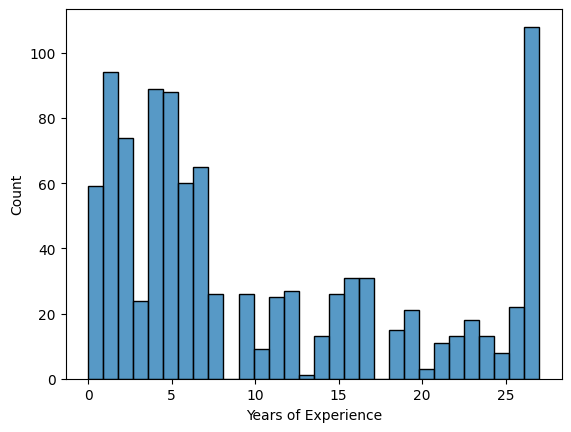

In [26]:
sns.histplot(x = "total_years_in_service", data = df, bins = 30)

plt.xlabel("Years of Experience")
plt.show()

In [27]:
filtered_df = df[df['total_years_in_service'] <= 5]

title_counts_within_range = filtered_df['title_description'].value_counts()

print(title_counts_within_range)

title_description
CHILD PROTECTIVE SPECIALIST                                  194
YOUTH DEVELOPMENT SPECIALIST                                  96
COMMUNITY COORDINATOR                                         20
PRINCIPAL ADMINISTRATIVE ASSOCIATE -  NON SUPVR               11
CONGREG CARE SPEC - ACS                                       10
SPECIAL OFFICER                                               10
CITY RESEARCH SCIENTIST                                        8
AGENCY ATTORNEY                                                7
PROGRAM EVALUATOR                                              6
ASSOCIATE YOUTH DEVELOPMENT SPECIALIST                         6
DIRECTOR OF FIELD OPERATIONS                                   5
CHILD AND FAMILY SPECIALIST                                    5
STAFF ANALYST                                                  5
COMMUNITY ASSOCIATE                                            4
ADMINISTRATIVE STAFF ANALYST                                   3
AGENCY 

In [28]:
average_metrics_by_title = filtered_df.groupby('title_description').agg(
    title_count=('title_description', 'count'),
    average_compensation=('total_compensation', 'mean'),
    average_overtime_worked=('ot_hours', 'mean'),
    average_overtime_pay=('total_ot_paid', 'mean'),
    average_other_pay=('total_other_pay', 'mean')
)
average_metrics_by_title = average_metrics_by_title.sort_values(by='title_count', ascending=False)

average_metrics_by_title

,title_count,average_compensation,average_overtime_worked,average_overtime_pay,average_other_pay
title_description,,,,,
CHILD PROTECTIVE SPECIALIST,194,44780.333969,106.271907,4666.304330,4502.523144
YOUTH DEVELOPMENT SPECIALIST,96,34595.067917,207.328125,8504.934063,4358.342292
COMMUNITY COORDINATOR,20,59690.438500,8.625000,345.586000,3302.991000
PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,11,46855.700909,13.568182,648.790909,739.977273
SPECIAL OFFICER,10,22032.115000,160.732000,4339.555000,3517.990000
CONGREG CARE SPEC - ACS,10,48680.072000,336.575000,11848.869000,4226.709000
CITY RESEARCH SCIENTIST,8,64160.510000,1.156250,53.622500,2661.250000
AGENCY ATTORNEY,7,73945.968571,77.142857,5150.218571,2995.360000
PROGRAM EVALUATOR,6,65106.181667,10.083333,481.901667,3339.953333
